In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
abc=pd.read_csv("delivery_time.csv")
abc

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
abc.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
abc.shape

(21, 2)

In [6]:
abc.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
abc.dropna()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


{'whiskers': [<matplotlib.lines.Line2D at 0x7d40a2b40e20>,
 'caps': [<matplotlib.lines.Line2D at 0x7d40a2b41360>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d40a2b40b20>],
 'medians': [<matplotlib.lines.Line2D at 0x7d40a2b418a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d40a2ced570>],
 'means': []}

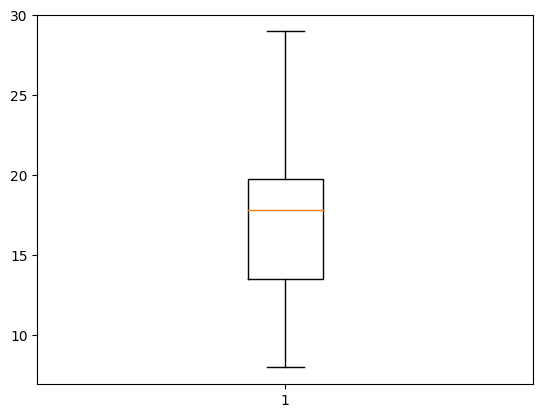

In [8]:
plt.boxplot(abc['Delivery Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d40a0a233a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d40a0a238e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d40a0a23100>],
 'medians': [<matplotlib.lines.Line2D at 0x7d40a0a23e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d40a0a58100>],
 'means': []}

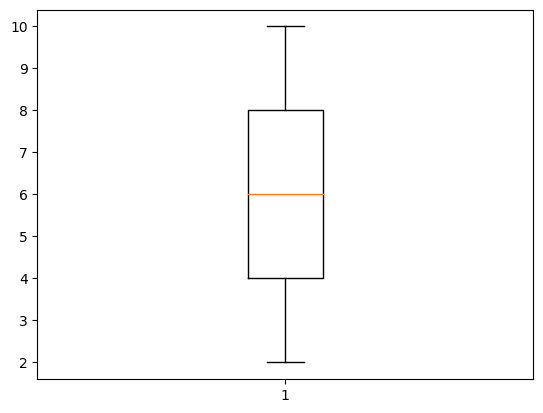

In [9]:
plt.boxplot(abc['Sorting Time'])

<ipython-input-10-90cb184da96e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(abc['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

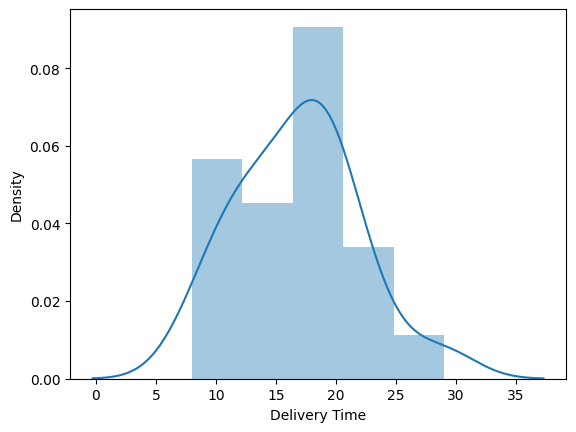

In [10]:
sns.distplot(abc['Delivery Time'])

<ipython-input-11-b4ce04823591>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(abc['Sorting Time'])


<Axes: xlabel='Sorting Time', ylabel='Density'>

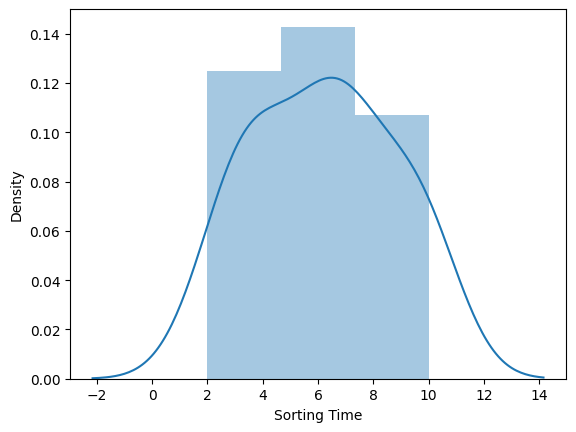

In [11]:
sns.distplot(abc['Sorting Time'])

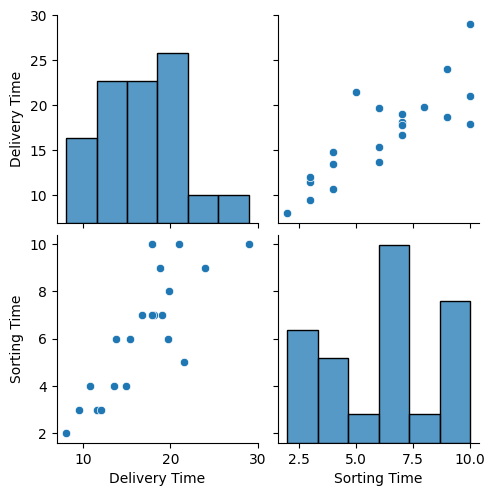

In [12]:
sns.pairplot(abc)

In [13]:
abc=abc.rename({'Delivery Time':'d_t', 'Sorting Time':'s_t'},axis=1)
abc       #rename function

,d_t,s_t
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [14]:
abc.corr()           #Correlation Analysis

,d_t,s_t
d_t,1.000000,0.825997
s_t,0.825997,1.000000


<Axes: xlabel='s_t', ylabel='d_t'>

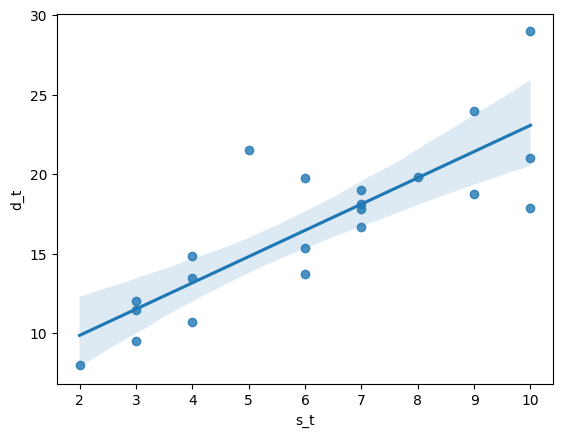

In [15]:
sns.regplot(x=abc['s_t'],y=abc['d_t'])


In [16]:
import statsmodels.formula.api as smf
model1 = smf.ols("d_t~s_t",data = abc).fit()

In [17]:
print(model1.params,'\n''\n',model1.tvalues,'\n''\n', model1.pvalues)

Intercept    6.582734
s_t          1.649020
dtype: float64 

 Intercept    3.823349
s_t          6.387447
dtype: float64 

 Intercept    0.001147
s_t          0.000004
dtype: float64


In [18]:
#R squared values
(model1.rsquared,model1.rsquared_adj)



(0.6822714748417231, 0.6655489208860244)

In [19]:
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    d_t   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        06:05:51   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
s_t            1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model2 = smf.ols("np.log(d_t)~np.log(s_t)",data = abc).fit()  #using log
print(model2.params,'\n''\n',model2.tvalues,'\n''\n', model2.pvalues)

Intercept      1.741987
np.log(s_t)    0.597522
dtype: float64 

 Intercept      13.085552
np.log(s_t)     8.024484
dtype: float64 

 Intercept      5.921137e-11
np.log(s_t)    1.601539e-07
dtype: float64


In [21]:
#R squared values
(model2.rsquared,model2.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

In [22]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(d_t)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.60e-07
Time:                        06:05:51   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.7420      0.133     13.086      0.000       1.463       2.021
np.log(s_t)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model3 = smf.ols("d_t~np.square(s_t)",data = abc).fit()    #using square
print(model3.params,'\n''\n',model3.tvalues,'\n''\n', model3.pvalues)

Intercept         11.237205
np.square(s_t)     0.124870
dtype: float64 

 Intercept         9.398601
np.square(s_t)    5.691330
dtype: float64 

 Intercept         1.415704e-08
np.square(s_t)    1.739194e-05
dtype: float64


In [24]:
#R squared values
(model3.rsquared,model3.rsquared_adj)

(0.6302871815826637, 0.6108286121922777)

In [25]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    d_t   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           1.74e-05
Time:                        06:05:51   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.2372      1.196      9.399      0.000       8.735      13.740
np.square(s_t)     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model4 = smf.ols("d_t~np.sqrt(s_t)",data = abc).fit()  #using square root
print(model4.params,'\n''\n',model4.tvalues,'\n''\n', model4.pvalues)

Intercept      -2.518837
np.sqrt(s_t)    7.936591
dtype: float64 

 Intercept      -0.840911
np.sqrt(s_t)    6.592434
dtype: float64 

 Intercept       0.410857
np.sqrt(s_t)    0.000003
dtype: float64


In [27]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    d_t   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Wed, 21 Feb 2024   Prob (F-statistic):           2.61e-06
Time:                        06:05:51   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(s_t)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""